In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

In [4]:
def read_all_scalars(log_path):
    ea = event_accumulator.EventAccumulator(log_path,
        size_guidance={
            event_accumulator.SCALARS: 0,
        })
    ea.Reload() # loads events from file
    tags = ea.Tags()["scalars"]
    metrics = {
        
    }
    for tag in tags:
        metrics[tag] = ea.Scalars(tag)

    return metrics

In [5]:
# Set the path to your tensorboard log

scalars = read_all_scalars("../outputs/vgg_VOC/tf_logs/events.out.tfevents.1616513142.jupyter_fredralm.5451.0")
scalars2 = read_all_scalars("../outputs/vgg_VOC/tf_logs/events.out.tfevents.1616517285.jupyter_fredralm.412.0")

In [6]:
print("Possible scalars to plot:")
for tag in scalars.keys():
    print("\t", tag)

Possible scalars to plot:
	 losses/total_loss
	 losses/reg_loss
	 losses/cls_loss
	 lr
	 metrics/voc_2007_test/mAP
	 metrics/voc_2007_test/aeroplane
	 metrics/voc_2007_test/bicycle
	 metrics/voc_2007_test/bird
	 metrics/voc_2007_test/boat
	 metrics/voc_2007_test/bottle
	 metrics/voc_2007_test/bus
	 metrics/voc_2007_test/car
	 metrics/voc_2007_test/cat
	 metrics/voc_2007_test/chair
	 metrics/voc_2007_test/cow
	 metrics/voc_2007_test/diningtable
	 metrics/voc_2007_test/dog
	 metrics/voc_2007_test/horse
	 metrics/voc_2007_test/motorbike
	 metrics/voc_2007_test/person
	 metrics/voc_2007_test/pottedplant
	 metrics/voc_2007_test/sheep
	 metrics/voc_2007_test/sofa
	 metrics/voc_2007_test/train
	 metrics/voc_2007_test/tvmonitor


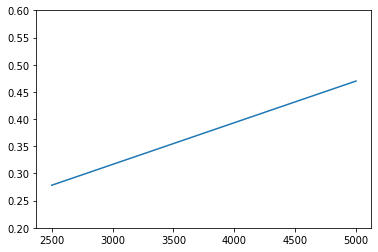

In [12]:
tag_to_plot = "metrics/voc_2007_test/mAP"
values = scalars[tag_to_plot] + scalars2[tag_to_plot]
iterations = [val.step for val in values]
values = [val.value for val in values]
plt.ylim([0.2, 0.6])
plt.plot(iterations, values)
plt.savefig('mAP_task4f.png')

In [9]:
%load_ext tensorboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir output
